In [20]:
import pandas as pd

moist = pd.read_csv('/home/pi/irrigation/test.csv')
# moist = pd.read_csv('test.csv')

In [21]:
moist.columns = ["Timetemp", "Temp", "Humidity"]
# moist

In [22]:
moist['Time'] = pd.to_datetime(moist["Timetemp"])
moist = moist.drop(columns='Timetemp')
moist.dtypes

Temp               float64
Humidity           float64
Time        datetime64[ns]
dtype: object

In [23]:
# moist['Time'].head()


In [24]:
moist = moist.set_index('Time')
# moist.head()


In [25]:
moist['Week']=moist.index.weekofyear
# moist['freq']=moist.index.freq
moist.tail()

,Temp,Humidity,Week
Time,,,
2019-06-09 20:08:57,14.0000,25.5748,23
2019-06-09 20:09:57,14.0000,25.8830,23
2019-06-09 20:10:58,14.0000,25.8324,23
2019-06-09 20:11:59,13.9375,26.1876,23
2019-06-09 20:13:00,13.8125,25.5148,23


In [26]:
import matplotlib.pyplot as plt

# moist['Humidity'].plot()

In [27]:
# moist['2019-06-01 14:00':].Humidity.plot(legend=True)
# moist['2019-06-01 14:00':].Temp.plot(secondary_y=True,label='Temp',legend=True)

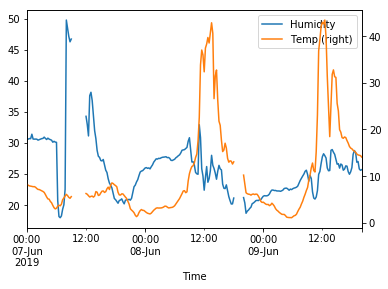

In [28]:
hourly = moist.resample('15Min').mean()
hourly['2019-06-07':].Humidity.plot(legend=True)
hourly['2019-06-07':].Temp.plot(secondary_y=True,legend=True)


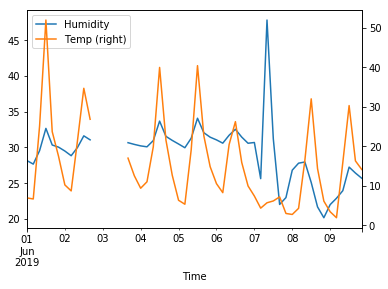

In [29]:
daily = moist.resample('4h').mean()
daily['2019-06':].Humidity.plot(legend=True)
daily['2019-06':].Temp.plot(secondary_y=True,legend=True)


In [30]:
submoist=moist['2019-06-06':]
m=submoist[1:].Humidity.values
tt=submoist.index-submoist.index[0]
trendStart = submoist.index[0]
tt=tt[1:]
tf=tt.to_frame()
# tf
# tf.Time.values.astype('float64')
# mt=tt.astype('timedelta64[m]')
tt1=tf.Time.values.astype('float64')
# tt1
mt=tt1.reshape(-1,1)
print(mt, mt.max())
mtmro=mt.max()+(24*3600)
print(mtmro.reshape(-1,1))
# mt=tt.to_pytimedelta
# print(mt.dtype,mt)
# print( m.dtype,m)

[[  6.10000000e+10]
 [  1.22000000e+11]
 [  1.82000000e+11]
 ..., 
 [  3.31811000e+14]
 [  3.31872000e+14]
 [  3.31933000e+14]] 3.31933e+14
[[  3.31933000e+14]]


In [31]:
from sklearn import datasets, linear_model
import numpy as np
regr = linear_model.LinearRegression()
regr.fit(mt,m)
mtmro=mt.max()+(24*3600*10)
print(mt.max(), '\n',np.array(mtmro))
newmt=np.array(mtmro).reshape(-1,1)
z=regr.predict(newmt)
print('future time\t',newmt,'\nPredicted\t',z)
print(regr.coef_)

3.31933e+14 
 331933000864000.0
future time	 [[  3.31933001e+14]] 
Predicted	 [ 22.55684076]
[ -2.86145399e-14]


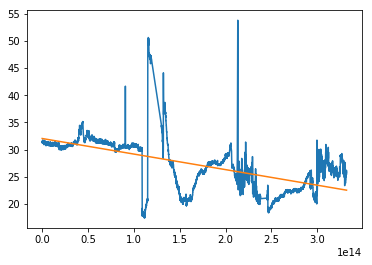

In [32]:
import matplotlib.pyplot as plt
plt.plot(mt,m)
plt.plot(mt,regr.predict(mt))

In [37]:
from datetime import datetime
#print(datetime.datetime.now().timestamp)
print(datetime.now())

2019-06-09 20:16:39.843794


In [42]:
from datetime import datetime,timedelta
startDate = datetime.now()-timedelta(5)
print (startDate.strftime('%Y-%m-%d'),'\n\n')

strtDate =startDate.strftime('%Y-%m-%d')

submoist=moist[strtDate:]
m=submoist[1:].Humidity.values
tt=submoist.index-submoist.index[0]
tt=tt[1:]
tf=tt.to_frame()

daysfcst = 3

tt1=tf.Time.values.astype('float64')

from sklearn import datasets, linear_model
import numpy as np
regr = linear_model.LinearRegression()
regr.fit(mt,m)
mtmro=mt.max()+(24*3600*10)
print(mt.max(), '\n',np.array(mtmro))
newmt=np.array(mtmro).reshape(-1,1)
z=regr.predict(newmt)
print('New future time\t',fdate,'\npredicted\t',z,'\nslope\t',regr.coef_)



2019-06-04 




ValueError: Found input variables with inconsistent numbers of samples: [5134, 7974]